In [1]:
%tensorflow_version 2.x

# use this to work with tensorflow 2.x on colab

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

from keras.datasets import fashion_mnist
(images_train, labels_train), (images_test,labels_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [6]:
images_test.shape

(10000, 28, 28)

In [7]:
labels_train.shape

(60000,)

In [10]:
labels_train=np.array(labels_train).reshape(-1,1)
labels_test=np.array(labels_test).reshape(-1,1)
labels_test.shape

(10000, 1)

In [11]:
onehot=OneHotEncoder()

onehot.fit(labels_train)

labels_train=onehot.transform(labels_train)
labels_test=onehot.transform(labels_test)
labels_train=labels_train.toarray()
labels_test=labels_test.toarray()

In [12]:
labels_test.shape

(10000, 10)

In [13]:
np.unique(labels_test)

array([0., 1.])

In [ ]:
images_train.shape

(60000, 28, 28)

In [ ]:
images_test.shape

(10000, 28, 28)

In [ ]:
28*28

784

In [14]:
images_train=np.array(images_train).reshape(60000,784)/255
images_test=np.array(images_test).reshape(10000,784)/255

In [16]:
images_train=images_train.reshape(60000,  28, 28,1).astype('float32')
images_test=images_test.reshape(10000, 28, 28,1).astype('float32')

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [ ]:
# Sequential API

In [18]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=( 28, 28,1), activation='relu',
                 padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3),activation='relu',padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2),activation='relu',padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(200, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Functional API

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [ ]:


image=Input(shape=(28,28,1))

conv1=Conv2D(32, (5, 5), activation='relu',padding='same')(image)
pool1=MaxPooling2D(pool_size=(2, 2))(conv1)

conv2=Conv2D(64, (5, 5),activation='relu',padding='same')(pool1)
pool2=MaxPooling2D(pool_size=(2, 2))(conv2)

flat_layer=Flatten()(pool2)

dense1=Dense(1024, activation='relu')(flat_layer)
drop1=Dropout(0.2)(dense1)

dense2=Dense(200, activation='relu')(drop1)
drop2=Dropout(0.2)(dense2)

output=Dense(10, activation='softmax')(drop2)

model=Model(inputs=image,outputs=output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0     

In [ ]:
from tensorflow.keras.utils import plot_model

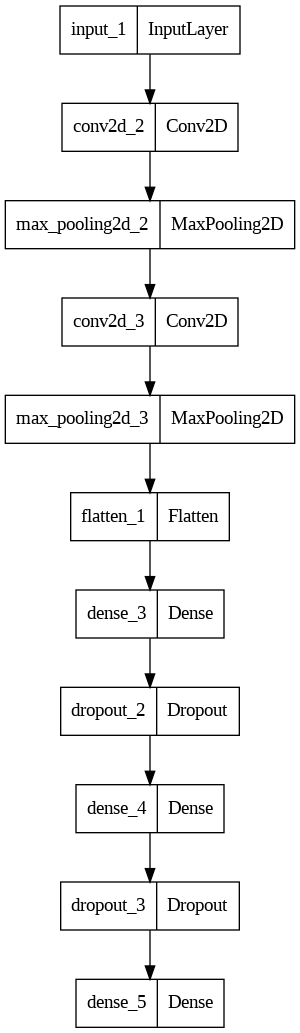

In [ ]:
plot_model(model)

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [20]:
model.fit(images_train,labels_train,validation_data=[images_test,labels_test],
         epochs=10,batch_size=5000,verbose=1)

Epoch 1/10
12/12 [==============================] - 1s 111ms/step - loss: 0.2092 - accuracy: 0.9232 - val_loss: 0.2510 - val_accuracy: 0.9089
Epoch 2/10
12/12 [==============================] - 1s 100ms/step - loss: 0.2061 - accuracy: 0.9249 - val_loss: 0.2527 - val_accuracy: 0.9087
Epoch 3/10
12/12 [==============================] - 1s 94ms/step - loss: 0.2080 - accuracy: 0.9231 - val_loss: 0.2408 - val_accuracy: 0.9101
Epoch 4/10
12/12 [==============================] - 1s 94ms/step - loss: 0.2042 - accuracy: 0.9243 - val_loss: 0.2429 - val_accuracy: 0.9103
Epoch 5/10
12/12 [==============================] - 1s 95ms/step - loss: 0.2016 - accuracy: 0.9255 - val_loss: 0.2490 - val_accuracy: 0.9092
Epoch 6/10
12/12 [==============================] - 1s 96ms/step - loss: 0.1994 - accuracy: 0.9265 - val_loss: 0.2391 - val_accuracy: 0.9131
Epoch 7/10
12/12 [==============================] - 1s 95ms/step - loss: 0.1982 - accuracy: 0.9278 - val_loss: 0.2412 - val_accuracy: 0.9129
Epoch 8/10


In [ ]:
# Saving the model

In [21]:
from tensorflow.keras.models import model_from_json
model_json = model.to_json()

with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model.h5")

In [22]:
# loading the model

In [23]:
from tensorflow.keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [24]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          8224      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 32)          0

In [25]:
loaded_model.load_weights("model.h5")

In [ ]:
# make prediction

In [26]:
p=loaded_model.predict(images_test)

313/313 [==============================] - 1s 3ms/step


In [27]:
labels_test_predicted=np.argmax(p,1)

In [28]:
# first argument to pd.crosstab goes to rows, second to columns
# row_0 : real labels
# col_0 : predicted labels
pd.crosstab(np.argmax(labels_test,axis=1),labels_test_predicted)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,879,0,14,7,2,1,92,0,5,0
1,1,980,0,9,5,0,4,0,1,0
2,14,0,848,10,70,0,58,0,0,0
3,20,1,9,897,26,0,45,0,2,0
4,0,0,34,22,889,0,55,0,0,0
5,0,0,0,0,0,977,0,16,0,7
6,98,1,49,24,78,0,744,0,6,0
7,0,0,0,0,0,7,0,978,0,15
8,3,0,4,2,1,2,2,2,984,0


In [29]:
y_true=np.argmax(labels_test,axis=1)

In [30]:
labels_test_predicted

array([9, 2, 1, ..., 8, 1, 5])

In [31]:
(y_true==labels_test_predicted).sum()

9140

In [32]:
a=y_true==labels_test_predicted

In [33]:
c=[i for i,j in enumerate(a) if not j]

In [34]:
c

[12,
 23,
 25,
 40,
 42,
 49,
 66,
 67,
 68,
 98,
 103,
 117,
 135,
 147,
 150,
 153,
 166,
 170,
 172,
 227,
 244,
 248,
 255,
 271,
 285,
 286,
 316,
 325,
 344,
 361,
 374,
 381,
 382,
 389,
 396,
 441,
 444,
 452,
 454,
 457,
 460,
 474,
 490,
 529,
 548,
 565,
 569,
 607,
 634,
 639,
 664,
 670,
 681,
 688,
 699,
 711,
 713,
 716,
 722,
 726,
 732,
 747,
 760,
 787,
 799,
 801,
 827,
 851,
 860,
 881,
 902,
 921,
 930,
 935,
 938,
 963,
 965,
 971,
 976,
 977,
 979,
 1000,
 1005,
 1055,
 1064,
 1066,
 1101,
 1104,
 1107,
 1111,
 1131,
 1139,
 1142,
 1160,
 1162,
 1165,
 1174,
 1192,
 1194,
 1197,
 1210,
 1223,
 1231,
 1249,
 1254,
 1280,
 1297,
 1300,
 1305,
 1329,
 1336,
 1352,
 1374,
 1376,
 1408,
 1425,
 1449,
 1455,
 1462,
 1487,
 1496,
 1509,
 1513,
 1522,
 1527,
 1533,
 1539,
 1572,
 1575,
 1586,
 1588,
 1602,
 1620,
 1626,
 1632,
 1642,
 1643,
 1645,
 1650,
 1665,
 1684,
 1686,
 1731,
 1732,
 1743,
 1744,
 1756,
 1771,
 1810,
 1814,
 1826,
 1833,
 1836,
 1841,
 1842,
 1852,

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

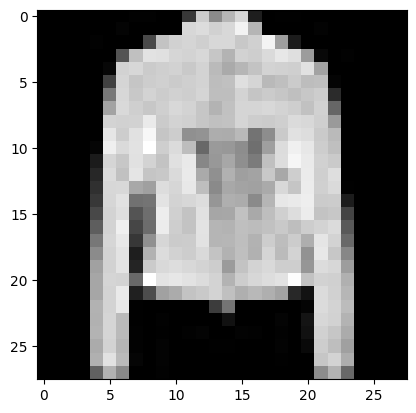

real label: 4
predicted label: 4


In [36]:
ind=7434
sample_image = images_test[ind,:,:,:]
# sample_image = np.array(sample_image, dtype='float')
pixels = sample_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
print('real label:',np.argmax(labels_test[ind]))
print('predicted label:',labels_test_predicted[ind])

In [ ]:
# you can make prediction directly but if you want to further train from here
# you'll have to compile the loaded model again

In [ ]:
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [ ]:
loaded_model.fit(images_train,labels_train,validation_data=[images_test,labels_test],
         epochs=3,batch_size=50,verbose=1)

Epoch 1/3
1200/1200 [==============================] - 8s 5ms/step - loss: 0.2390 - accuracy: 0.9124 - val_loss: 0.2601 - val_accuracy: 0.9077
Epoch 2/3
1200/1200 [==============================] - 6s 5ms/step - loss: 0.2073 - accuracy: 0.9230 - val_loss: 0.2515 - val_accuracy: 0.9116
Epoch 3/3
1200/1200 [==============================] - 6s 5ms/step - loss: 0.1801 - accuracy: 0.9329 - val_loss: 0.2299 - val_accuracy: 0.9176
